In [1]:
from qsextra import ExcitonicSystem, ChromophoreSystem
from qsextra.tools import spectral_function, unit_converter
from qsextra.spectroscopy import FeynmanDiagram, clspectroscopy
from qsextra.spectroscopy.postprocessing import postprocessing
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt

In [2]:
epsilon = [1.55,1.46]    # [eV]
J = toeplitz([0., -0.01])    # [eV]
N = len(epsilon)

In [3]:
esys = ExcitonicSystem(energies = epsilon,
                       dipole_moments = [1.] * N,
                       couplings = J,
                      )

In [4]:
dt_fs = 0.1    # [fs]
t_final = 200.    # [fs]
t_list_plot = np.arange(0, t_final + dt_fs, dt_fs)    # [fs]
# Now convert to eV^-1
t_list = unit_converter(t_list_plot, initial_unit = 'fs', final_unit = 'eV-1')    # [eV-1]
dt = t_list[1] - t_list[0]    # [eV-1]
# For the quantum execution we reduce the time list in order to save computational time
times_plot = np.arange(0, t_final + dt_fs, 100 * dt_fs)    # [fs]
times = unit_converter(times_plot, initial_unit = 'fs', final_unit = 'eV-1')    # [eV-1]

Gamma = 59.08 * 10**(-3)

spec = FeynmanDiagram('a', times)

# Exciton System

In [5]:
signal_ex = clspectroscopy(esys, spec, rates=Gamma/4)

We do not wash our pits in the pool of sacred tears. [Master Shifu]


C:\Users\fede\anaconda3\envs\qsextra_test\Lib\site-packages\scipy\integrate\_ode.py:431: UserWarning: _zvode: Excess work done on this call. (Perhaps wrong MF.)
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


In [6]:
freq, spectrum_ex = postprocessing(spec,
                                   signal_ex,
                                   pad_extension = 3,
                                   RF_freq = 1.505,
                                   )

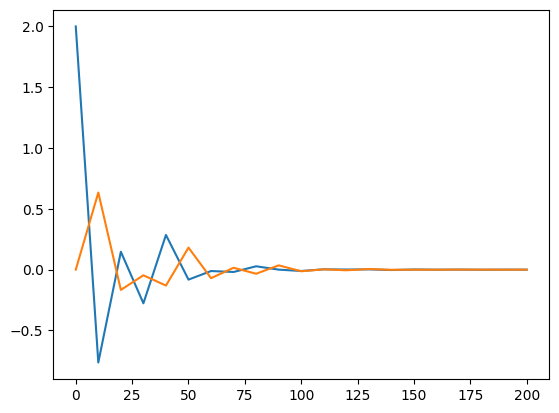

In [7]:
plt.plot(times_plot, signal_ex.real);
plt.plot(times_plot, signal_ex.imag);

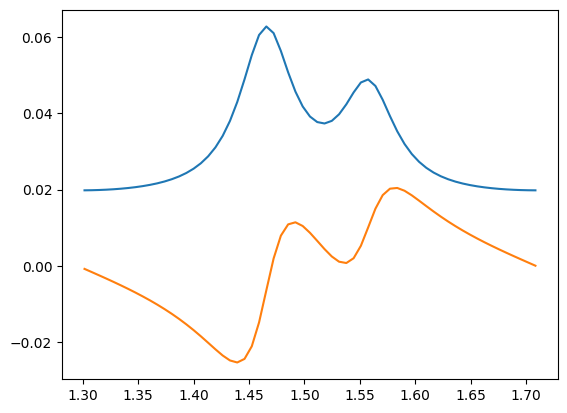

In [8]:
plt.plot(freq, spectrum_ex.real);
plt.plot(freq, spectrum_ex.imag);

# Chromophore system

In [9]:
sys = ChromophoreSystem(excitonic_system = esys)

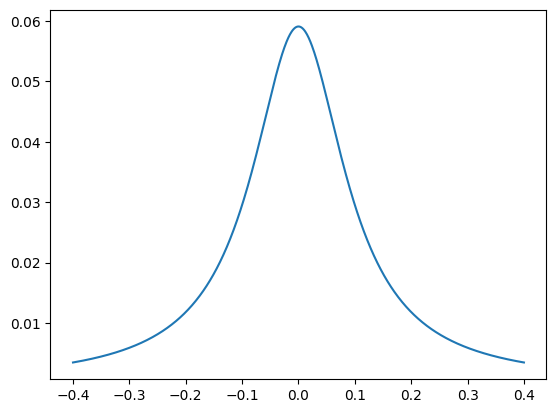

In [10]:
W = 1
frequencies_pseudomode = [0] * W
Gamma_list = [Gamma / W] * W
Omega_list = [0.1] * W
fr, sf = spectral_function(frequencies_pseudomode, Gamma_list, Omega_list)
plt.plot(fr, sf)

In [11]:
sys.pseudomodes(frequencies_pseudomode = frequencies_pseudomode,
                levels_pseudomode = [2]*len(frequencies_pseudomode),
                couplings_ep = np.sqrt(np.array(Gamma_list)*np.array(Omega_list)/2).tolist(),
               )
coll_rate = (2 * np.array(Omega_list)).tolist()

In [12]:
signal_ch = clspectroscopy(sys, spec, rates=coll_rate)

Let's not forget what happened to the man who suddenly got everything he wanted. [Po]


In [13]:
freq, spectrum_ch = postprocessing(spec,
                                   signal_ch,
                                   pad_extension = 3,
                                   RF_freq = 1.505,
                                  )

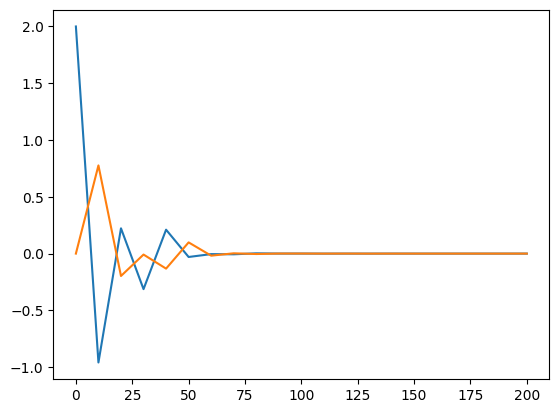

In [14]:
plt.plot(times_plot, signal_ch.real);
plt.plot(times_plot, signal_ch.imag);

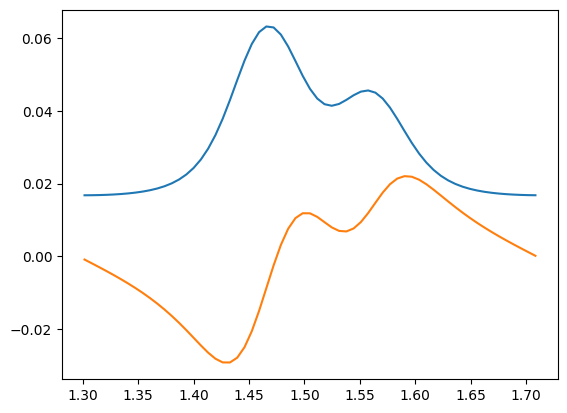

In [15]:
plt.plot(freq, spectrum_ch.real);
plt.plot(freq, spectrum_ch.imag);

# Comparison

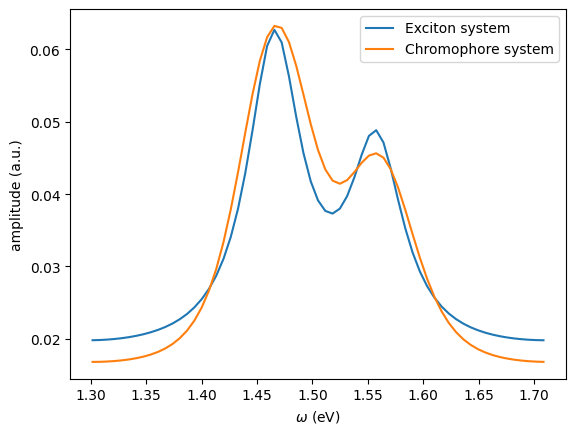

In [16]:
plt.plot(freq, spectrum_ex.real, label = 'Exciton system')
plt.plot(freq, spectrum_ch.real, label = 'Chromophore system')
plt.legend()
plt.xlabel(r'$\omega$ (eV)')
plt.ylabel(r'amplitude (a.u.)');